# AUTO PRICE

# Step 1 - Problem Definition   <!-- Largest -->

## Research Problem

**Focus Question:**  
“How do horsepower and weight relate to vehicle price?”

This is a **regression problem**, as the goal is to predict a continuous outcome (car price) based on explanatory variables (*horsepower* and *weight*).

---

### Stakeholders
- **Car buyers** → identify which technical specifications (engine power and weight) justify higher prices.  
- **Dealerships and resellers** → price cars more competitively by understanding which attributes contribute most to value.  
- **Manufacturers** → gain insights into how design features (engine size, build weight) impact consumer willingness to pay.  
- **Car racers and enthusiasts** → understand how weight influences horsepower and overall performance, helping evaluate cars not just for price, but also for speed, efficiency, and racing potential.  

---

### Expected Outcome
By solving this problem, we uncover the **key performance and design factors** that drive car prices.  
This enhances transparency in the car market and provides **decision support** for buyers, sellers, and manufacturers alike, making it a practically valuable and persuasive study.


# Step 2 - Data Description <!-- Largest -->

### Loading the auto_price.csv dataset into a pandas DataFrame for cleaning and analysis.

In [1063]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
df = pd.read_csv("auto_price.csv")

### Displaying the first few rows of the dataset with all columns visible for inspection.

In [1066]:
pd.set_option("display.max_columns",None)
df.head()

,Unnamed: 0,Make_Model,Body_Type,Price,Vat,Mileage,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Age,Previous_Owners,Horsepower,Inspection_New,Paint_Type,Upholstery_Type,Gearing_Type,Displacement,Weight,Drive_Chain,Cons_Comb
0,0,Audi A1,Sedans,$15770.0,NaN,34804.85 mi,Used,NaN,NaN,"Air conditioning,Armrest,Automatic climate con...",NaN,NaN,NaN,3.0,NaN,66.0 kW,1.0,NaN,NaN,Automatic,1422.0 cc,1220.0 kg,front,NaN
1,1,Audi A1,Sedans,NaN,NaN,80000.0 km,NaN,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...",NaN,"Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0 kW,0.0,NaN,NaN,Automatic,NaN,2766.80 lbs,front,5.6
2,2,Audi A1,Sedans,$14640.0,NaN,51853.41 mi,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...",NaN,"Alloy wheels,Voice Control",NaN,3.0,NaN,85.0 kW,0.0,NaN,NaN,Automatic,NaN,2502.24 lbs,NaN,NaN
3,3,Audi A1,NaN,NaN,NaN,45360.08 mi,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...",NaN,NaN,NaN,3.0,1.0,66.0 kW,0.0,Metallic,NaN,Automatic,NaN,1195.0 kg,NaN,3.8
4,4,Audi A1,Sedans,$16790.0,NaN,16200.0 km,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",NaN,NaN,3.0,NaN,66.0 kW,NaN,NaN,NaN,Automatic,NaN,1135.0 kg,NaN,4.1


### Dataset Dimensions

In [1069]:
rows,cols = df.shape
print(f"Number of rows in auto_price dataset: {rows} rows")
print(f"Number of columns in auto_price dataset: {cols} columns")

Number of rows in auto_price dataset: 18286 rows
Number of columns in auto_price dataset: 24 columns


### Dataset Information - Data Types, Non-Null Summary, Missing Values (%) & Unique Data per Column.

In [1072]:
def getinfo(data):
    info_df = pd.DataFrame({
        "Column": df.columns,
        "Data Type": df.dtypes.astype(str),
        "Non Null Count": df.count().values,
        "Null Data Count": df.isnull().sum().values,
        "Missing %": (df.isnull().sum().values / len(df) * 100),
        "Unique Data Count": df.nunique(dropna=True).values #excluding Nan values
    })
    return info_df
info_df = getinfo(df)
info_df

,Column,Data Type,Non Null Count,Null Data Count,Missing %,Unique Data Count
Unnamed: 0,Unnamed: 0,int64,18286,0,0.000000,18286
Make_Model,Make_Model,object,16092,2194,11.998250,9
Body_Type,Body_Type,object,16092,2194,11.998250,8
Price,Price,object,14995,3291,17.997375,4541
Vat,Vat,object,11886,6400,34.999453,2
Mileage,Mileage,object,16641,1645,8.995953,7507
Type,Type,object,14446,3840,20.999672,5
Fuel,Fuel,object,11155,7131,38.997047,4
Gears,Gears,float64,13166,5120,27.999563,4
Comfort_Convenience,Comfort_Convenience,object,14081,4205,22.995734,5289


### Numerical vs Categorical Features

In [1075]:
def find_datatypes(data):
    num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
    str_cols = data.select_dtypes(include=['object']).columns.tolist()
    return str_cols,num_cols
str_cols, num_cols = find_datatypes(df)
print("Object Data Type Columns:", str_cols)
print("Numerical Data Type Columns:", num_cols)

Object Data Type Columns: ['Make_Model', 'Body_Type', 'Price', 'Vat', 'Mileage', 'Type', 'Fuel', 'Comfort_Convenience', 'Entertainment_Media', 'Extras', 'Safety_Security', 'Horsepower', 'Paint_Type', 'Upholstery_Type', 'Gearing_Type', 'Displacement', 'Weight', 'Drive_Chain']
Numerical Data Type Columns: ['Unnamed: 0', 'Gears', 'Age', 'Previous_Owners', 'Inspection_New', 'Cons_Comb']


### Unique Count & Values in Categorical Columns

In [1078]:
for col in str_cols:
    print(f"{col} Unique Value Count: {df[col].nunique()}")
    print(f"{col} Unique Values: {df[col].unique()}")

Make_Model Unique Value Count: 9
Make_Model Unique Values: ['Audi A1' nan 'Audi A2' 'Audi A3' 'Opel Astra' 'Opel Corsa'
 'Opel Insignia' 'Renault Clio' 'Renault Duster' 'Renault Espace']
Body_Type Unique Value Count: 8
Body_Type Unique Values: ['Sedans' nan 'Station wagon' 'Compact' 'Coupe' 'Van' 'Off-Road'
 'Convertible' 'Transporter']
Price Unique Value Count: 4541
Price Unique Values: ['$15770.0' nan '$14640.0' ... '€10178.85' '$31700.0' '£8097.50']
Vat Unique Value Count: 2
Vat Unique Values: [nan 'VAT deductible' 'Price negotiable']
Mileage Unique Value Count: 7507
Mileage Unique Values: ['34804.85 mi' '80000.0 km' '51853.41 mi' ... '39230.88 mi' '58482.82 mi'
 '10870.0 km']
Type Unique Value Count: 5
Type Unique Values: ['Used' nan "Employee's car" 'New' 'Demonstration' 'Pre-registered']
Fuel Unique Value Count: 4
Fuel Unique Values: [nan 'Benzine' 'Diesel' 'LPG/CNG' 'Electric']
Comfort_Convenience Unique Value Count: 5289
Comfort_Convenience Unique Values: ['Air conditioning,Arm

### Visualization of Missing Values (%) per Column(Bar chart)

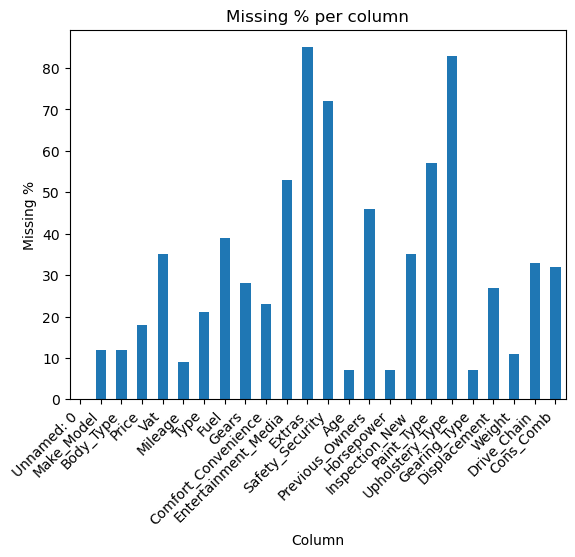

In [1081]:
if not info_df.empty:
    info_df.set_index("Column")["Missing %"].plot.bar()
    plt.ylabel("Missing %")
    plt.title("Missing % per column")
    plt.xticks(rotation=45, ha='right')
    plt.show()

### Visualization of Distribution of Data Types(Bar Chart)

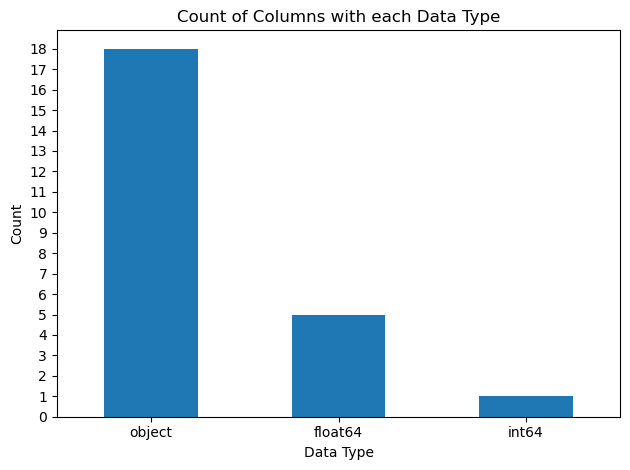

In [1084]:
if not info_df.empty:
    info_df["Data Type"].value_counts().plot.bar()
    plt.ylabel("Count")
    plt.title("Count of Columns with each Data Type")
    plt.xticks(rotation=0)
    plt.yticks(range(0, info_df["Data Type"].value_counts().max() + 1)) 
    plt.tight_layout()
    plt.show()

# Step 3 - Data Cleaning and Processing <!-- LARGEST -->

### Droping Unnecessary/Unnamed Column

In [1088]:
df=df.drop('Unnamed: 0',axis=1)
df.head()

,Make_Model,Body_Type,Price,Vat,Mileage,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,Age,Previous_Owners,Horsepower,Inspection_New,Paint_Type,Upholstery_Type,Gearing_Type,Displacement,Weight,Drive_Chain,Cons_Comb
0,Audi A1,Sedans,$15770.0,NaN,34804.85 mi,Used,NaN,NaN,"Air conditioning,Armrest,Automatic climate con...",NaN,NaN,NaN,3.0,NaN,66.0 kW,1.0,NaN,NaN,Automatic,1422.0 cc,1220.0 kg,front,NaN
1,Audi A1,Sedans,NaN,NaN,80000.0 km,NaN,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...",NaN,"Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0 kW,0.0,NaN,NaN,Automatic,NaN,2766.80 lbs,front,5.6
2,Audi A1,Sedans,$14640.0,NaN,51853.41 mi,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...",NaN,"Alloy wheels,Voice Control",NaN,3.0,NaN,85.0 kW,0.0,NaN,NaN,Automatic,NaN,2502.24 lbs,NaN,NaN
3,Audi A1,NaN,NaN,NaN,45360.08 mi,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...",NaN,NaN,NaN,3.0,1.0,66.0 kW,0.0,Metallic,NaN,Automatic,NaN,1195.0 kg,NaN,3.8
4,Audi A1,Sedans,$16790.0,NaN,16200.0 km,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",NaN,NaN,3.0,NaN,66.0 kW,NaN,NaN,NaN,Automatic,NaN,1135.0 kg,NaN,4.1


### Removing Duplicate Rows

In [1091]:
original_dataset = df.shape[0]
df.drop_duplicates(inplace = True)
dupdroped_dataset = df.shape[0]
no_of_dup_rows = original_dataset - dupdroped_dataset
print("dropped",no_of_dup_rows,"duplicate rows from the dataset")

dropped 0 duplicate rows from the dataset


### Detecting Units in Key Columns(Needed for standardization)

In [1094]:
research_columns = ['Horsepower','Displacement','Weight','Cons_Comb','Price','Mileage']

In [1096]:
def record_units(data):
    string = data.astype(str).str.lower().str.strip()
    pattern = pattern = pattern = r'[^0-9,./-]+'
    all_units = []
    for text in string.dropna():
        units = re.findall(pattern, text)
        for token in units:
            token = token.strip()
            if token:
                all_units.append(token)
    return pd.Series(all_units).value_counts()

In [1098]:
def find_units(targets):
    for col in targets:
        if col in df.columns:
            print(f"\ncolumn details of '{col}'")
            unit_counts = record_units(df[col])
            print(unit_counts)
        else:
            print(f"Column '{col}' not found in DataFrame.")

In [1100]:
find_units(research_columns)


column details of 'Horsepower'
kw     17006
nan     1280
Name: count, dtype: int64

column details of 'Displacement'
cc     13349
nan     4937
Name: count, dtype: int64

column details of 'Weight'
kg     9097
lbs    4829
g      2349
nan    2011
Name: count, dtype: int64

column details of 'Cons_Comb'
nan    5851
Name: count, dtype: int64

column details of 'Price'
$      8111
€      4806
nan    3291
£      2078
Name: count, dtype: int64

column details of 'Mileage'
km     8828
mi     7813
nan    1645
Name: count, dtype: int64


### `convert_data()` – Function Description  

The `convert_data()` function is designed to standardize the columns in the dataset by:  

- **Removing unwanted text/units** such as symbols or formatting characters.  
- **Converting values** into a consistent numerical format for analysis.  
- **Handling invalid entries** by replacing negative or non-numeric values with `NaN`.  

In [1103]:
def convert_data(data, mapping_values):
    data = data.astype(str).str.strip().str.lower()
    result = []
    for d in data:
        modified_value = None
        for cur_symbol, multiplier in mapping_values.items():
            if cur_symbol in d:
                try:
                    modified_value = float(d.replace(cur_symbol, "").replace(",", "")) * multiplier
                except:
                    modified_value = np.nan
                break  
        if modified_value is None:
            try:
                modified_value = float(d.replace(",", ""))
            except:
                modified_value = np.nan
        if modified_value is not None and modified_value < 0:
            modified_value = np.nan
        result.append(modified_value)
    return pd.Series(result, index=data.index)

##### Standardizing Price

In [1106]:
currency_rates = {"€": 1.10, "£": 1.30, "$": 1.0}
df["Price"] = convert_data(df["Price"], currency_rates)
df.loc[df["Price"] < 0, "Price"] = np.nan
df["Price"] = df["Price"].round(2)
df["Price"]

0        15770.0
1            NaN
2        14640.0
3            NaN
4        16790.0
          ...   
18281    12490.0
18282        NaN
18283    16990.0
18284        NaN
18285        NaN
Name: Price, Length: 18286, dtype: float64

##### Standardizing Mileage

In [1109]:
Mileage_rates = {"km": 1, "mi": 1.60}
df["Mileage"] = convert_data(df["Mileage"], Mileage_rates)
df.loc[df["Mileage"] < 0, "Mileage"] = np.nan
df["Mileage"] = df["Mileage"].round(2)
df["Mileage"]

0        55687.76
1        80000.00
2        82965.46
3        72576.13
4        16200.00
           ...   
18281    87850.00
18282    62769.41
18283    29545.44
18284    93572.51
18285    10870.00
Name: Mileage, Length: 18286, dtype: float64

##### Standardizing Weight

In [1112]:
weight_rates = {"kg": 1, "lbs": 0.453, "g": 0.001}
df["Weight"] = convert_data(df["Weight"], weight_rates)
df.loc[df["Weight"] < 0, "Weight"] = np.nan
df["Weight"] = df["Weight"].round(2)
df["Weight"]

0        1220.00
1        1253.36
2        1133.51
3        1195.00
4        1135.00
          ...   
18281    1360.00
18282        NaN
18283    1250.00
18284    2316.97
18285    1133.51
Name: Weight, Length: 18286, dtype: float64

##### Standardizing Displacement

In [1115]:
Displacement_rates = {"cc": 1}
df["Displacement"] = convert_data(df["Displacement"], Displacement_rates)
df.loc[df["Displacement"] < 0, "Displacement"] = np.nan
df["Displacement"] = df["Displacement"]
df["Displacement"]

0        1422.0
1           NaN
2           NaN
3           NaN
4           NaN
          ...  
18281       NaN
18282     999.0
18283    1598.0
18284    1956.0
18285     999.0
Name: Displacement, Length: 18286, dtype: float64

##### Standardizing Horsepower

In [1118]:
Horsepower_rates = {"kw": 1}
df["Horsepower"] = convert_data(df["Horsepower"], Horsepower_rates)
df.loc[df["Horsepower"] < 0, "Horsepower"] = np.nan
df["Horsepower"] = df["Horsepower"]
df["Horsepower"]

0         66.0
1        141.0
2         85.0
3         66.0
4         66.0
         ...  
18281     81.0
18282     70.0
18283     81.0
18284    125.0
18285      NaN
Name: Horsepower, Length: 18286, dtype: float64

In [1120]:
df["Cons_Comb"] # kept for analysis, No unit conversion.

0        NaN
1        5.6
2        NaN
3        3.8
4        4.1
        ... 
18281    NaN
18282    4.4
18283    3.9
18284    5.6
18285    4.3
Name: Cons_Comb, Length: 18286, dtype: float64

### Ploting boxplots of all numerical columns to visually detect outliers

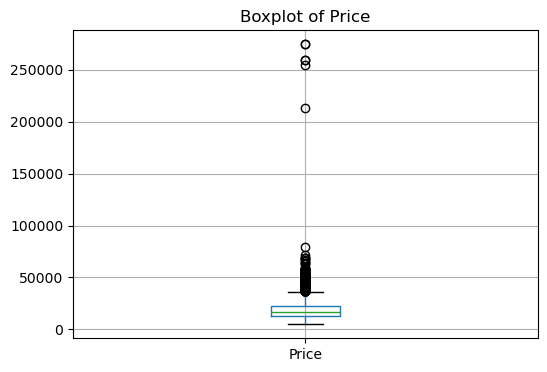

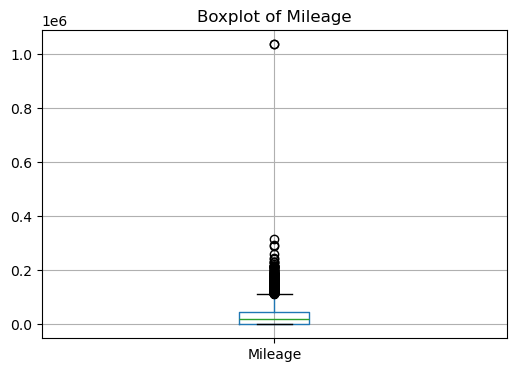

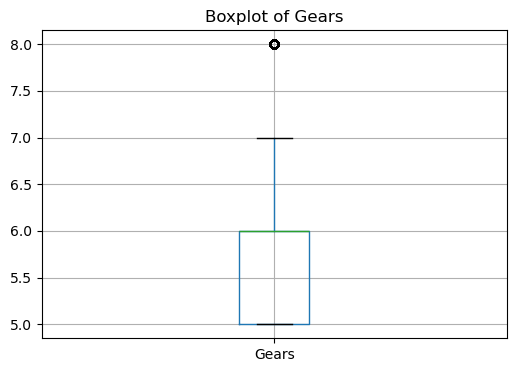

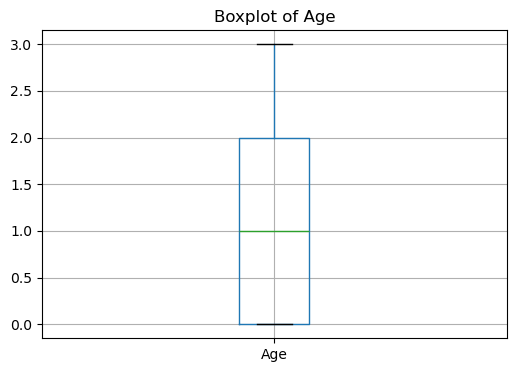

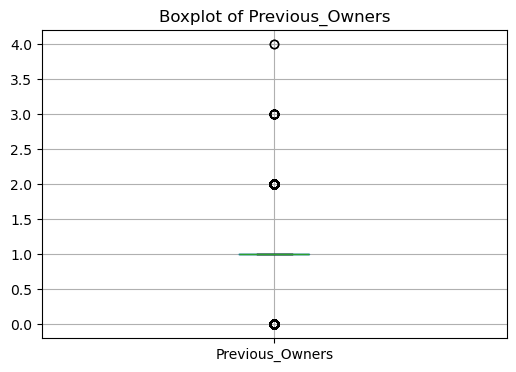

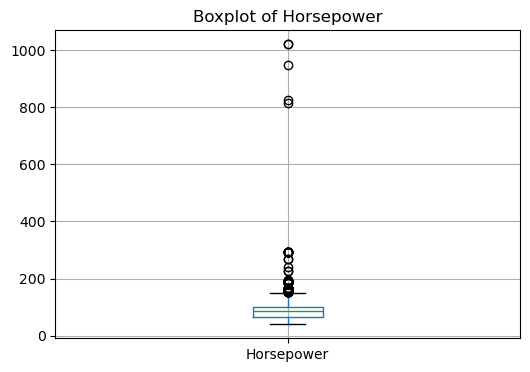

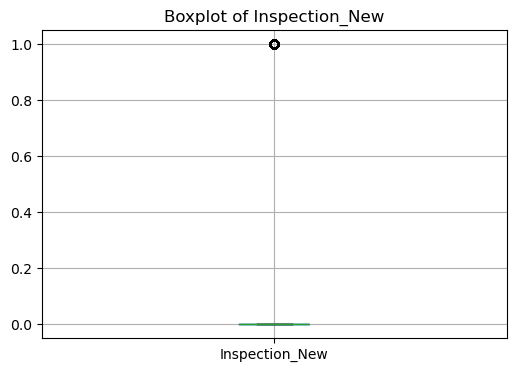

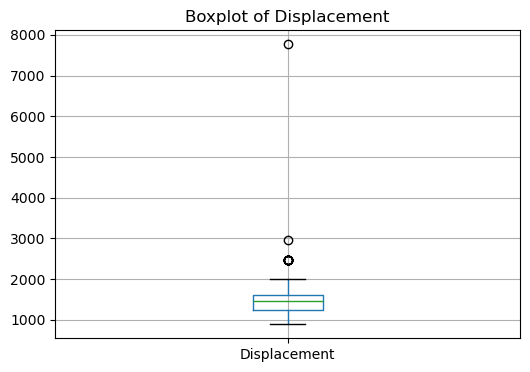

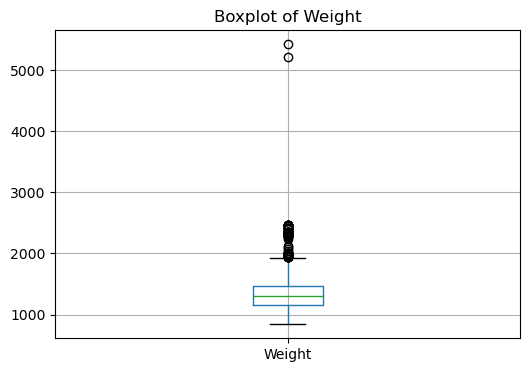

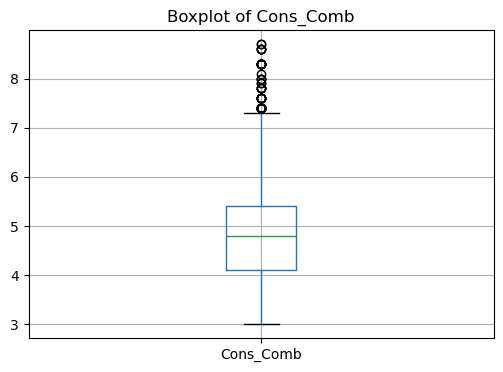

In [1123]:
str_cols,num_cols = find_datatypes(df) 
for col in num_cols:
    plt.figure(figsize=(6, 4))
    df[[col]].boxplot()  
    plt.title(f"Boxplot of {col}")
    plt.show()

### Calculating skewness of each numerical column to assess data distribution shape.

In [1125]:
for column in df.columns:
    if column in num_cols:
        print(column,df[column].skew())

Price 8.534358642607158
Mileage 3.5768033063767612
Gears 0.326869897463697
Age 0.18360837743472722
Previous_Owners 1.211625005987488
Horsepower 7.3004259463025605
Inspection_New 1.166549949712611
Displacement 0.7524583494423647
Weight 1.9357647334575978
Cons_Comb 0.4365821407758584


### Plots histograms of numerical columns before cleaning to visualize distributions and skewness.

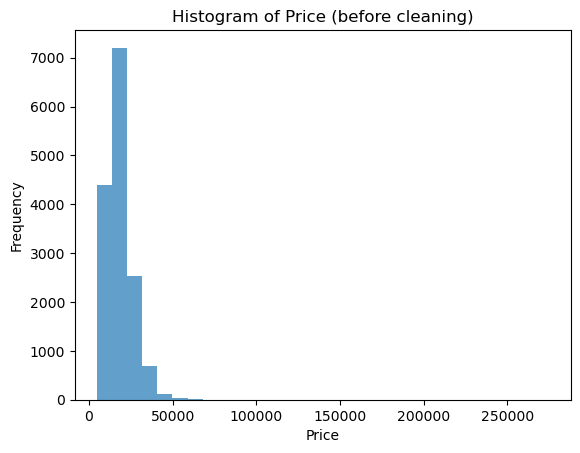

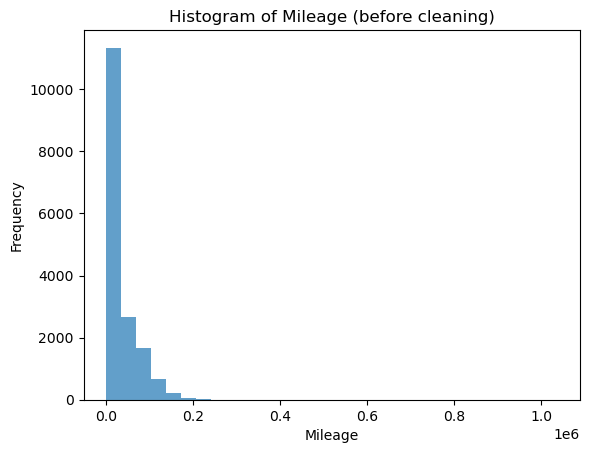

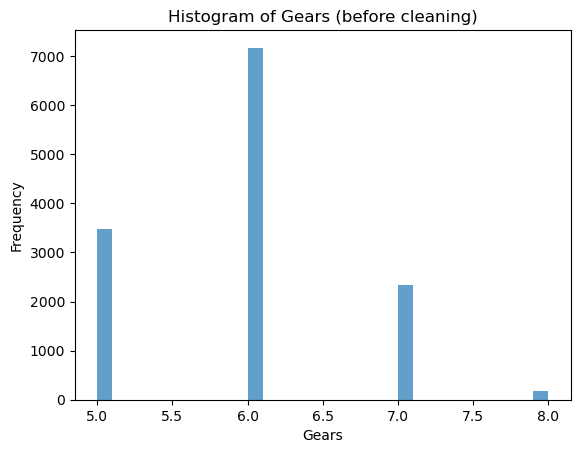

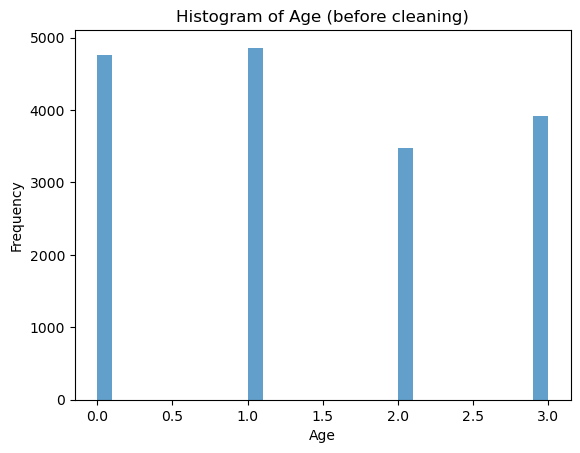

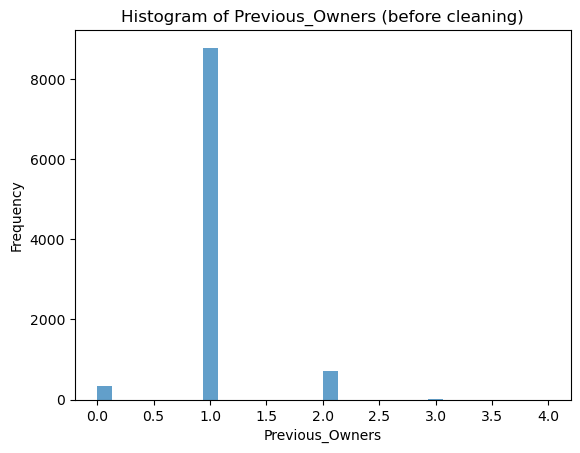

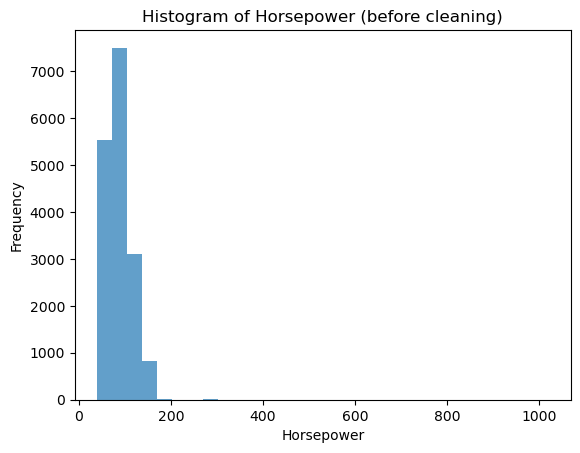

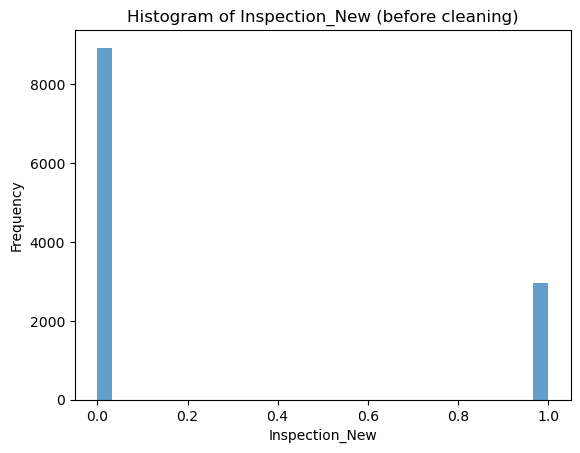

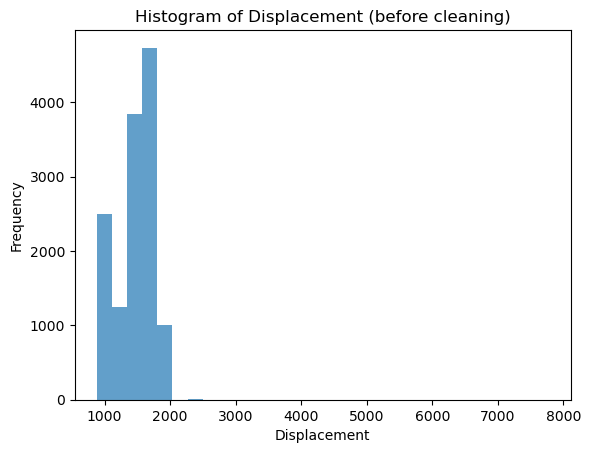

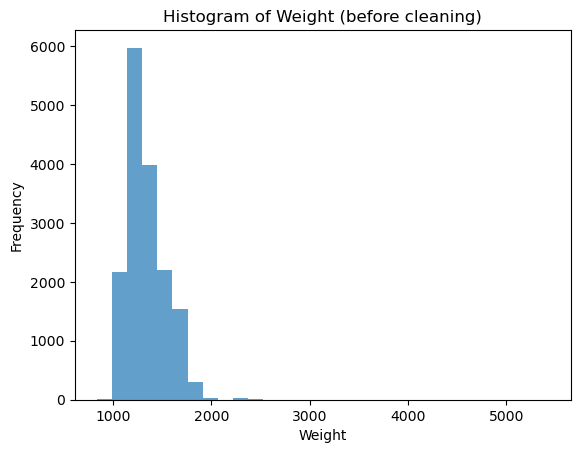

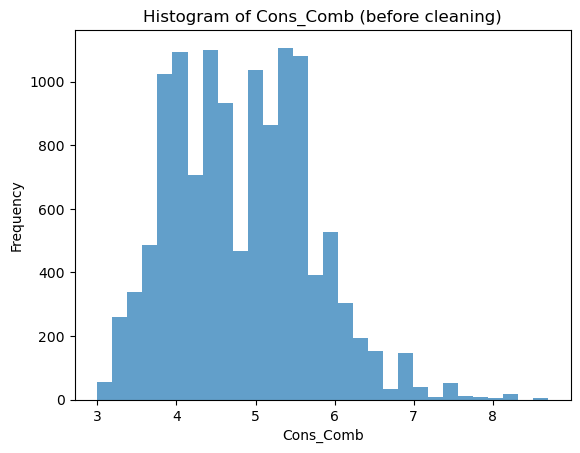

In [1129]:
import matplotlib.pyplot as plt
for col in num_cols:
    df[col].plot.hist(bins=30, alpha=0.7)
    plt.title(f'Histogram of {col} (before cleaning)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Detecting outliers in numeric columns using the IQR method and replaces them with the median value.

In [1131]:
def outlier_detector(df, column):
    series = df[column]
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_mask = (series < lower_bound) | (series > upper_bound)
    median_value = round(series.median(), 2)
    df.loc[outlier_mask, column] = median_value   
    return outlier_mask, lower_bound, upper_bound
for col in num_cols:
    outlier_mask, lower_bound, upper_bound = outlier_detector(df, col)
    print(f"Count of outliers in {col}: {outlier_mask.sum()}")
    print(f"Lower bound for {col}: {lower_bound}, Upper bound: {upper_bound}\n")

Count of outliers in Price: 405
Lower bound for Price: -1129.0, Upper bound: 36495.0

Count of outliers in Mileage: 719
Lower bound for Mileage: -65446.075000000004, Upper bound: 113843.645

Count of outliers in Gears: 186
Lower bound for Gears: 3.5, Upper bound: 7.5

Count of outliers in Age: 0
Lower bound for Age: -3.0, Upper bound: 5.0

Count of outliers in Previous_Owners: 1084
Lower bound for Previous_Owners: 1.0, Upper bound: 1.0

Count of outliers in Horsepower: 427
Lower bound for Horsepower: 13.5, Upper bound: 153.5

Count of outliers in Inspection_New: 2949
Lower bound for Inspection_New: 0.0, Upper bound: 0.0

Count of outliers in Displacement: 16
Lower bound for Displacement: 675.5, Upper bound: 2151.5

Count of outliers in Weight: 93
Lower bound for Weight: 700.7, Upper bound: 1934.78

Count of outliers in Cons_Comb: 97
Lower bound for Cons_Comb: 2.1499999999999986, Upper bound: 7.350000000000001



### Printing the count of missing values in each column.

In [1135]:
print(df.isnull().sum())

Make_Model              2194
Body_Type               2194
Price                   3296
Vat                     6400
Mileage                 1649
Type                    3840
Fuel                    7131
Gears                   5120
Comfort_Convenience     4205
Entertainment_Media     9691
Extras                 15543
Safety_Security        13165
Age                     1280
Previous_Owners         8411
Horsepower              1284
Inspection_New          6400
Paint_Type             10423
Upholstery_Type        15177
Gearing_Type            1280
Displacement            4939
Weight                  2017
Drive_Chain             6034
Cons_Comb               5851
dtype: int64


### Defining imputation rules (mean/median/mode) for each column and fills missing values accordingly, ensuring dataset completeness.

In [1138]:
"""
Anything with skew ≥ 1 is considered highly skewed → use median.

Discrete or binary columns → use mode/median.

Low-skew numeric columns → use mean.

Imputation strategy based on skewness + discreteness:

Price: skew = 8.53 → median (highly skewed)

Mileage: skew = 3.58 → median (highly skewed)

Gears: skew = 0.33 → mean (nearly symmetric; if treated as discrete, median/mode can be used)

Age: skew = 0.18 → mean (symmetric)

Previous_Owners: skew = 1.21 → median (discrete + high skew)

Horsepower: skew = 7.30 → median (highly skewed)

Inspection_New: skew = 1.17 → median (binary)

Displacement: skew = 0.75 → mean (moderate skew, still symmetric enough)

Weight: skew = 1.94 → median (highly skewed)

Cons_Comb: skew = 0.44 → mean (low skew)
"""
strategy = {
    "Price": "median",
    "Mileage": "median",
    "Gears": "mean",  
    "Age": "mean",
    "Previous_Owners": "median",
    "Horsepower": "median",
    "Inspection_New": "median",
    "Displacement": "mean",
    "Weight": "median",
    "Cons_Comb": "mean",
}

def replacing_nan_with_median_or_mode(data):
    percentage_missing_values = data.isnull().mean() * 100
    str_cols = data.select_dtypes(include=["object"]).columns
    num_cols = data.select_dtypes(include=[np.number]).columns

    for d in data.columns:
        if d in str_cols:
            if percentage_missing_values[d] > 50:
                data.drop(columns=[d], inplace=True)
            elif percentage_missing_values[d] <= 25:
                data[d] = data[d].fillna(data[d].mode()[0])
            else:
                data[d] = data[d].fillna("Unknown")
        else:
            if d in strategy:
                method = strategy[d]
                if method == "median":
                    value_median = round(data[d].median(), 2)
                    data[d] = data[d].fillna(value_median).astype(float)
                elif method == "mean":
                    value_mean = round(data[d].mean(), 2)
                    data[d] = data[d].fillna(value_mean).astype(float)
                elif method == "mode":
                    value_mode = round(data[d].mode()[0], 2)
                    data[d] = data[d].fillna(value_mode).astype(float)
                    
    return data

df = replacing_nan_with_median_or_mode(df)

### Reploting boxplots after outlier treatment to confirm reduced extreme values.

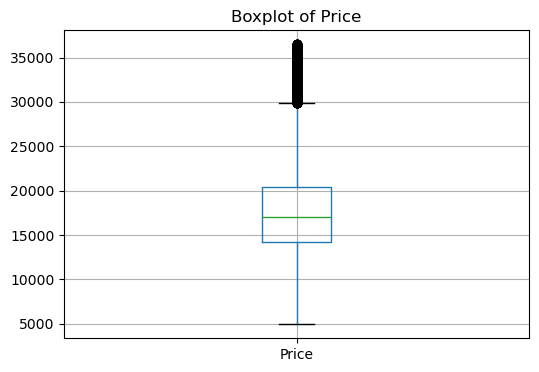

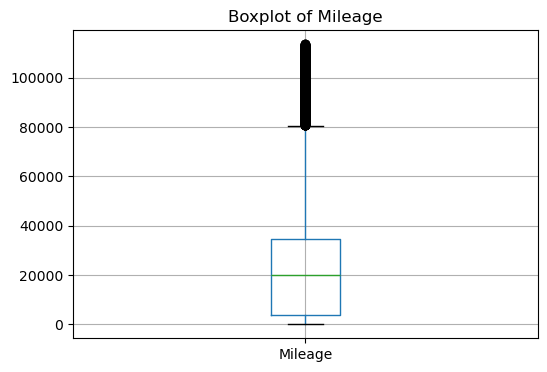

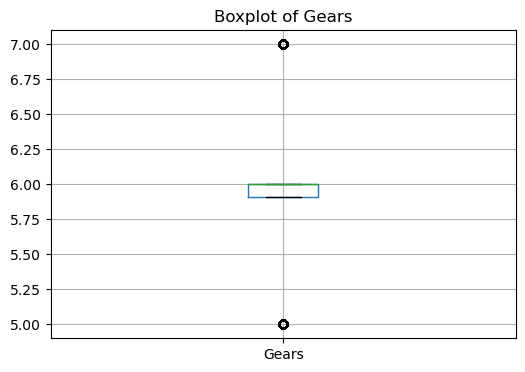

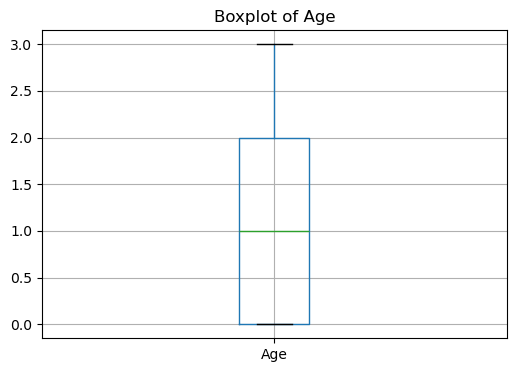

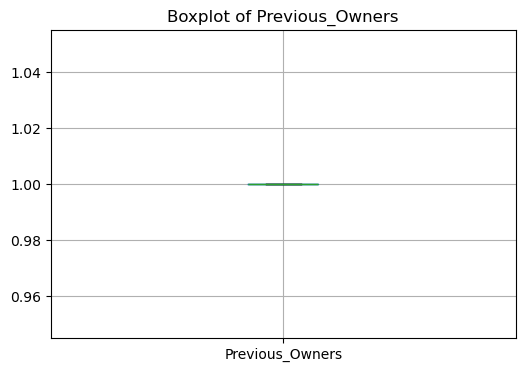

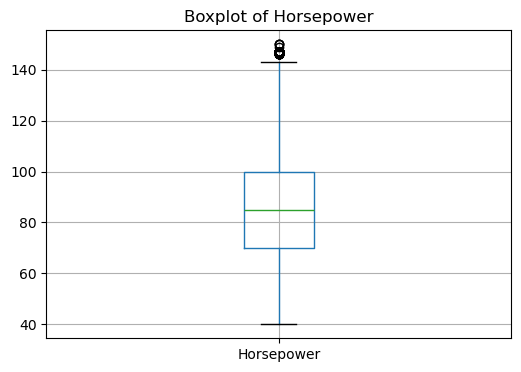

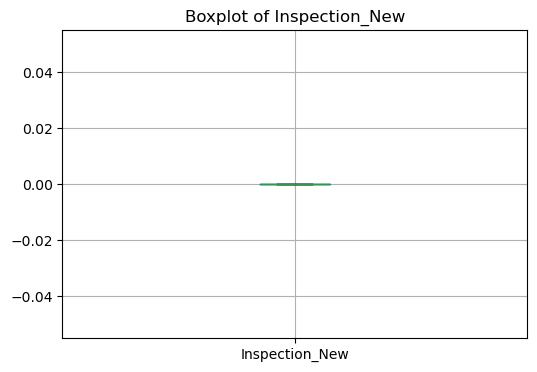

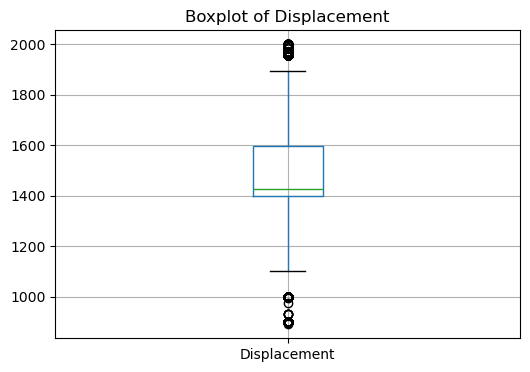

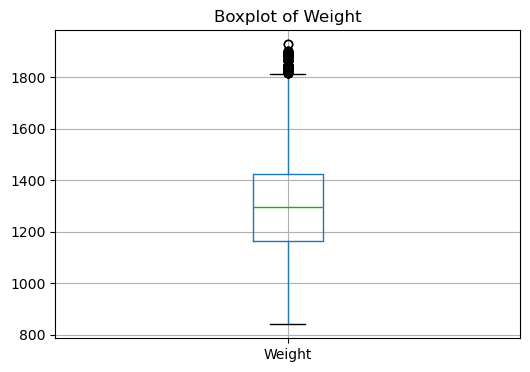

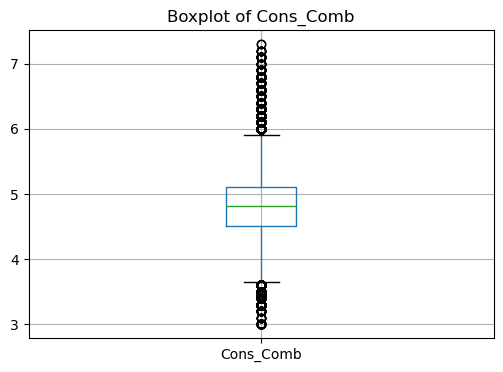

In [1141]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    df[[col]].boxplot()  # or df[col].plot.box()
    plt.title(f"Boxplot of {col}")
    plt.show()

### Printing skewness of numerical columns after cleaning to evaluate improvement in data distribution.

In [1143]:
for column in df.columns:
    if column in num_cols:
        print(column,df[column].skew())

Price 0.6577047983135742
Mileage 1.3228719718638706
Gears 0.11519364403675374
Age 0.19126788794784833
Previous_Owners 0.0
Horsepower 0.5739956559403765
Inspection_New 0.0
Displacement -0.18458465900772242
Weight 0.8903905835004273
Cons_Comb 0.27900615707652116


### Ploting histograms of numerical columns after cleaning to compare distributions and skewness.

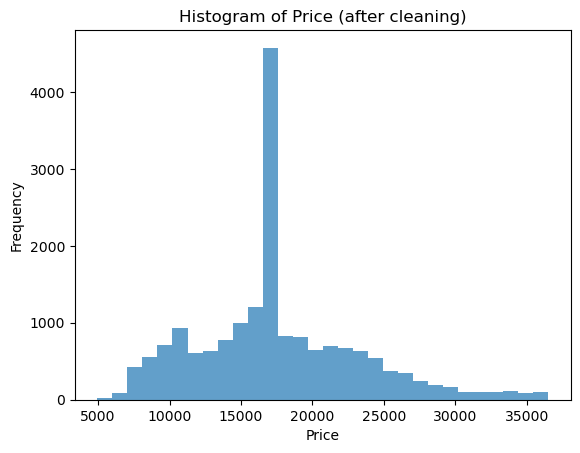

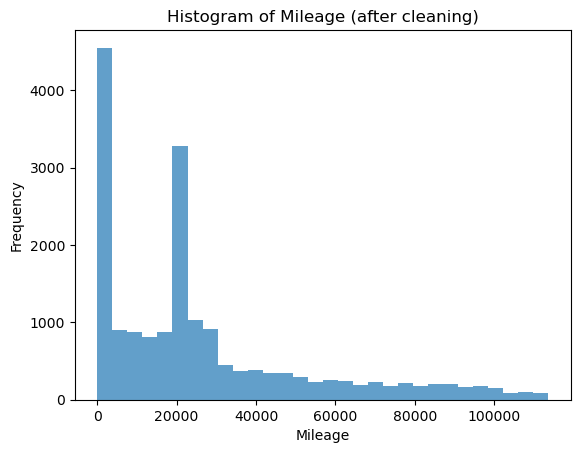

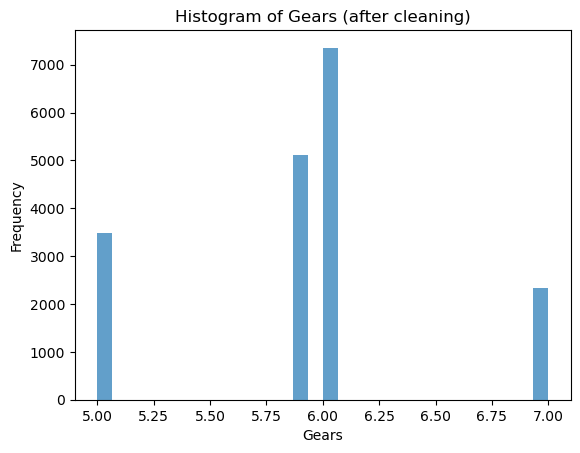

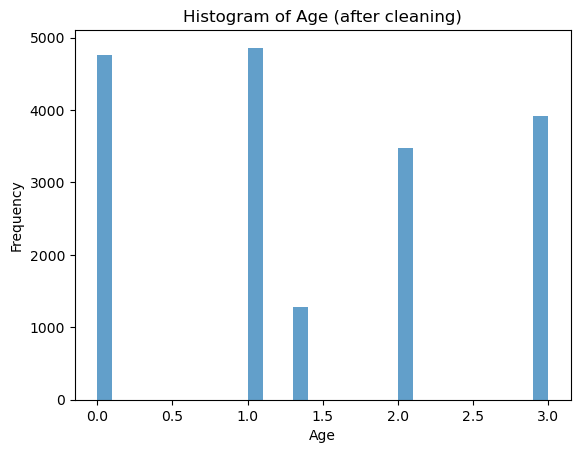

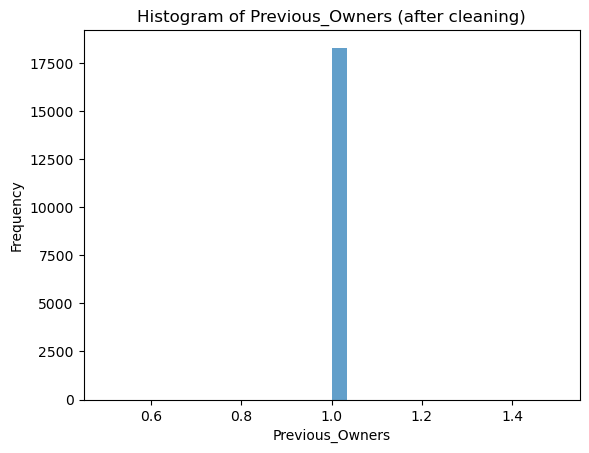

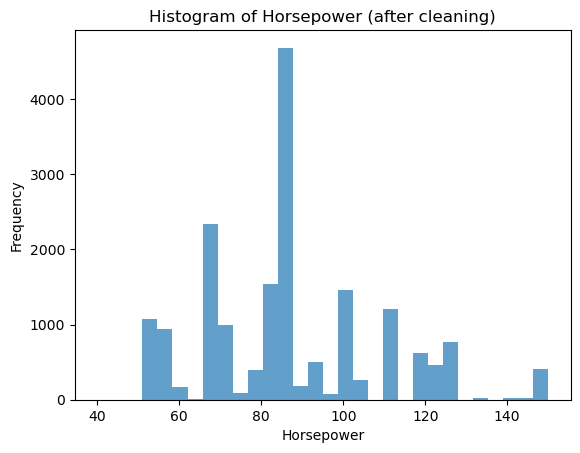

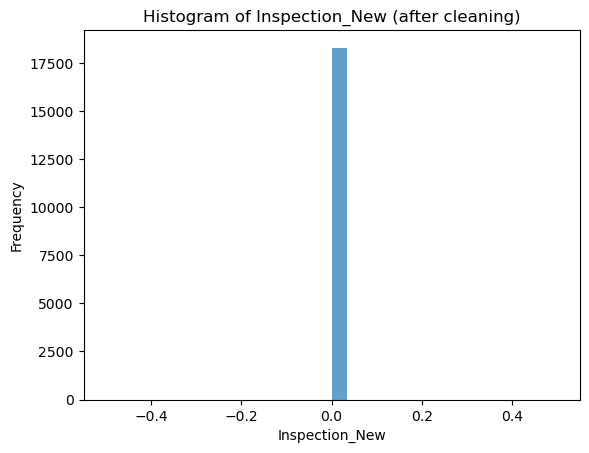

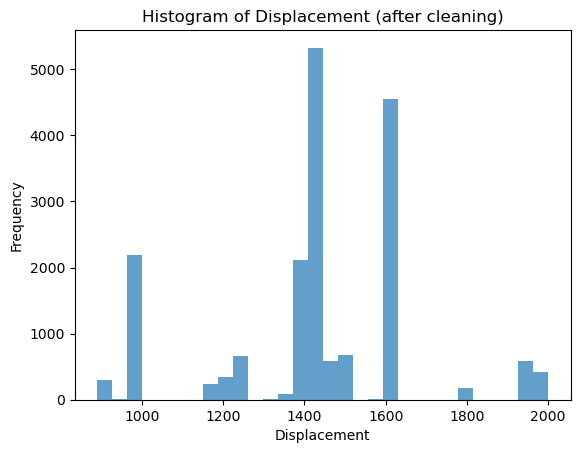

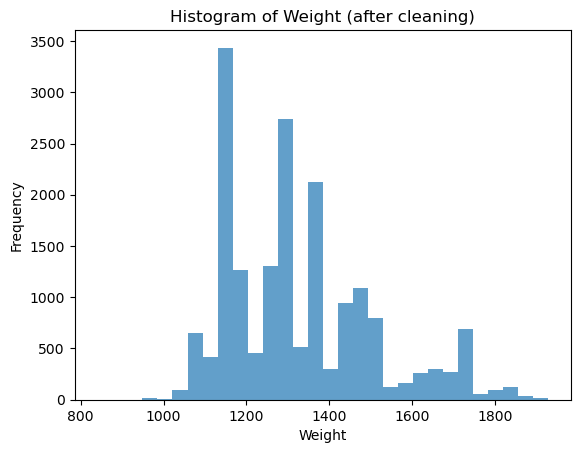

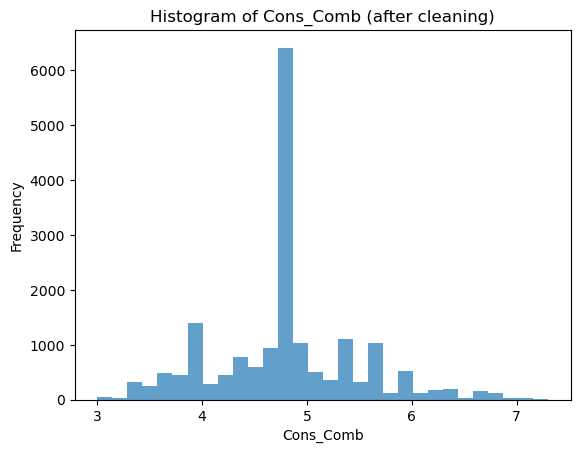

In [1147]:
import matplotlib.pyplot as plt
for col in num_cols:
    df[col].plot.hist(bins=30, alpha=0.7)
    plt.title(f'Histogram of {col} (after cleaning)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Strandadizing Categorical columns

In [1149]:
cat_cols = df.select_dtypes(include=["object"]).columns

for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.title()

##### checking the datatypes after standardization.

In [1153]:
str_cols,num_cols = find_datatypes(df) 
print("Object Data Type Columns:", str_cols)
print("Numerical Data Type Columns:", num_cols)

Object Data Type Columns: ['Make_Model', 'Body_Type', 'Vat', 'Type', 'Fuel', 'Comfort_Convenience', 'Gearing_Type', 'Drive_Chain']
Numerical Data Type Columns: ['Price', 'Mileage', 'Gears', 'Age', 'Previous_Owners', 'Horsepower', 'Inspection_New', 'Displacement', 'Weight', 'Cons_Comb']


### Displaying dataset summary after cleaning, showing columns, non-null counts, and data types.

In [1156]:
print(df.isnull().sum())
df.info()

Make_Model             0
Body_Type              0
Price                  0
Vat                    0
Mileage                0
Type                   0
Fuel                   0
Gears                  0
Comfort_Convenience    0
Age                    0
Previous_Owners        0
Horsepower             0
Inspection_New         0
Gearing_Type           0
Displacement           0
Weight                 0
Drive_Chain            0
Cons_Comb              0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18286 entries, 0 to 18285
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make_Model           18286 non-null  object 
 1   Body_Type            18286 non-null  object 
 2   Price                18286 non-null  float64
 3   Vat                  18286 non-null  object 
 4   Mileage              18286 non-null  float64
 5   Type                 18286 non-null  object 
 6   Fuel                 18

### Saving the cleaned dataset as auto_price_cleaned.csv in the Downloads folder.

In [1171]:
df.to_csv("auto_price_cleaned.csv", index=False)

# Step 4 - Exploratory Data Analysis     <!-- Largest -->

## Correlation Matrix (Overall Insights)

The correlation matrix reveals several key relationships within the dataset:

- **Price** shows strong positive correlation with *Horsepower*, *Gears*, and *Weight*, and a negative correlation with *Age*, confirming that newer, more powerful cars with advanced features are valued higher.
- **Engine-related features** (*Horsepower*, *Displacement*, *Weight*) are interrelated, reflecting natural dependencies in vehicle design.
- **Fuel consumption (Cons_Comb)** shows weak correlations with most features, suggesting it has less direct impact on pricing in this dataset.

**Overall:** The dataset shows logical and interpretable relationships between price, performance, and age, validating its suitability for regression analysis.


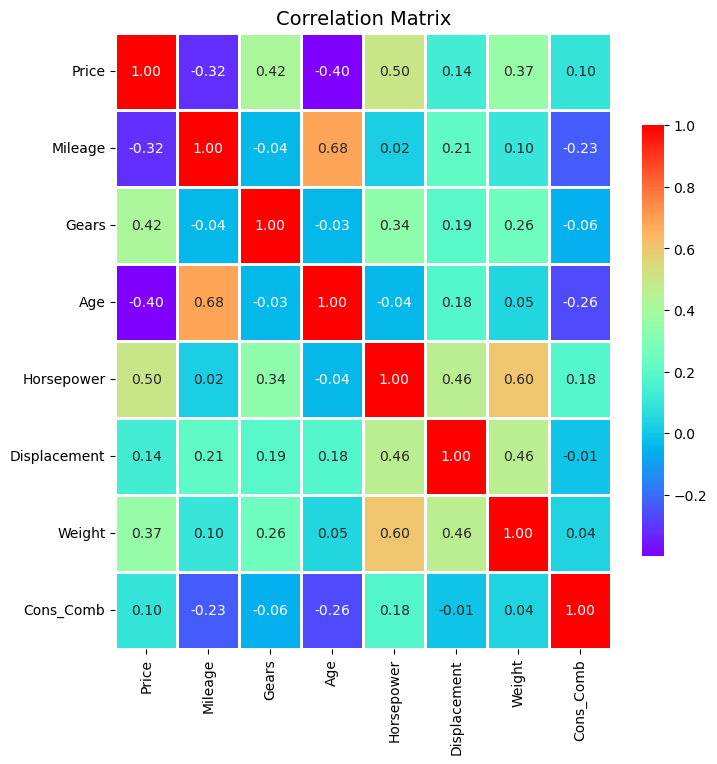

In [1163]:
import seaborn as sns
import matplotlib.pyplot as plt

num_features = ['Price', 'Mileage', 'Gears', 'Age', 'Horsepower', 'Displacement', 'Weight', 'Cons_Comb']
corr_matrix = df[num_features].corr()

plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, cmap="rainbow", fmt=".2f", linewidths=2, cbar_kws={"shrink": 0.7})
plt.title("Correlation Matrix", fontsize=14)
plt.show()


## Scatterplots (Numerical Features vs Price)

- **Price vs Horsepower:** Clear positive trend → cars with higher horsepower tend to have higher prices.  
- **Price vs Weight:** Positive relationship → heavier cars are generally more expensive, likely due to larger size and added features.  

✅ **Insight:** These plots reinforce the dataset’s logic — performance and build size are strong price drivers.


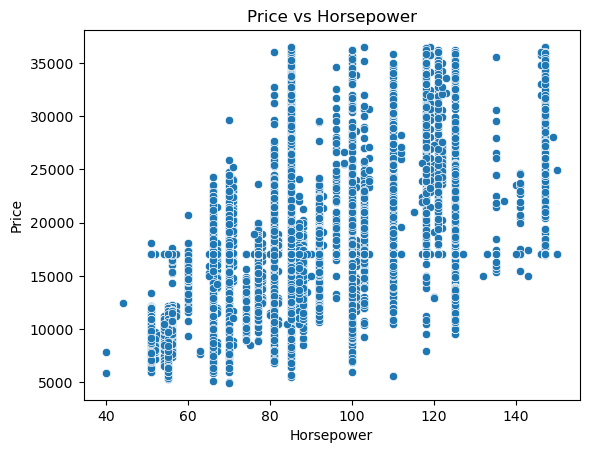

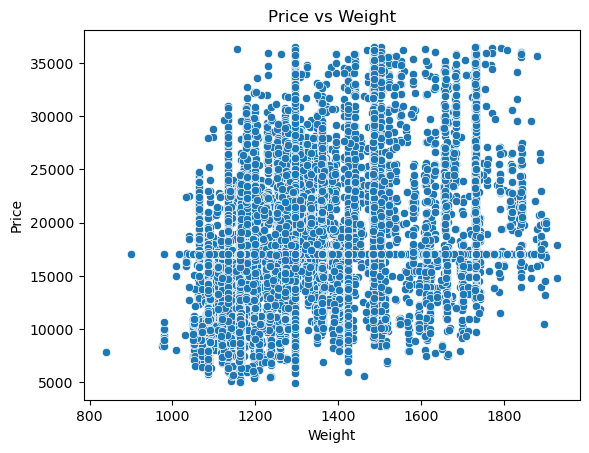

In [1166]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="Horsepower", y="Price", data=df)
plt.title("Price vs Horsepower")
plt.show()

sns.scatterplot(x="Weight", y="Price", data=df)
plt.title("Price vs Weight")
plt.show()


## Bar Plots (Categorical Features vs Price)

- **Median Price by Fuel Type:** Cars running on different fuel types show clear price variation, with some fuel categories commanding higher resale values.  
- **Median Price of Top 10 Car Makes:** Certain brands (top 10 makes) consistently have higher median prices, highlighting the effect of brand reputation on car value.  

**Insight:** Beyond engine performance and age, fuel type and brand identity are important categorical drivers of price.


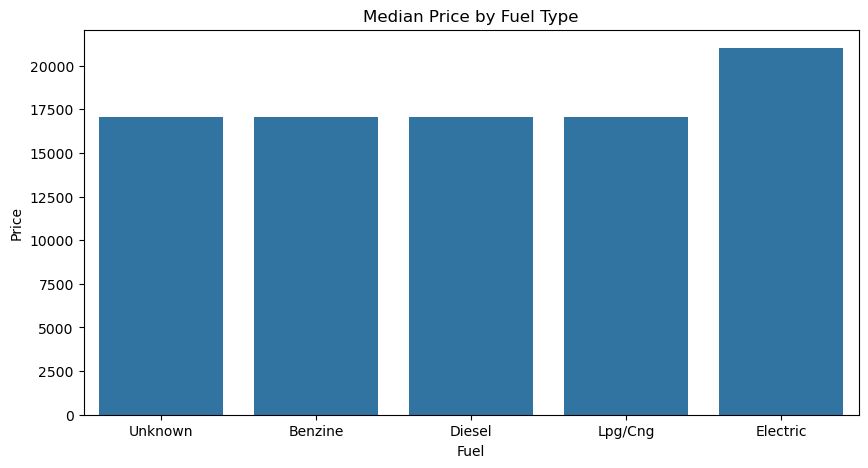

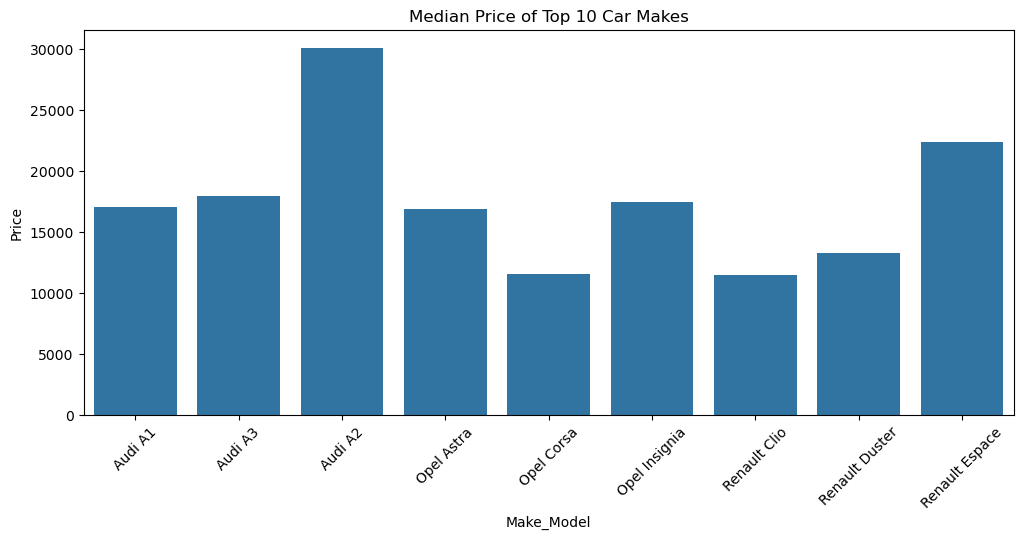

In [1169]:
plt.figure(figsize=(10,5))
sns.barplot(x="Fuel", y="Price", data=df, estimator="median",errorbar=None)
plt.title("Median Price by Fuel Type")
plt.show()

plt.figure(figsize=(12,5))
top_makes = df["Make_Model"].value_counts().head(10).index
sns.barplot(x="Make_Model", y="Price", data=df[df["Make_Model"].isin(top_makes)],estimator="median",errorbar=None)
plt.title("Median Price of Top 10 Car Makes")
plt.xticks(rotation=45)
plt.show()